## 1) Import rquired libraries

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import numpy as np
import math
import missingno as msno
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## 2) Sourcing and loading

In [3]:
#Load Accounts data from 'AllAccountReads.xlsx' file

#Load Accounts data for year 2017-2018
data1 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_17_18')
#Load Accounts data for year 2018-2019
data2 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_18_19')
#Load Accounts data for year 2019-2020
data3 = pd.read_excel('AllAccountReads.xlsx', sheet_name= 'Usage_19_20')

In [4]:
df1 = data1.copy()
df2 = data2.copy()
df3 = data3.copy()

## 3) Overview DataFrames

In [5]:
print('df1')
print(df1.head(3).T)
print('df2')
print(df2.head(3).T)
print('df3')
print(df3.head(3).T)

df1
                                   0                    1                    2
LOC ID                    1000000000           1000000001           1000000002
WTR_RATE                      W-RSFD               W-RSFD               W-RSFD
WTR_DWEL_UNIT                      1                    1                    1
WTR_USE1                          22                    9                   10
WTR_USE2                          22                    8                    7
WTR_USE3                          15                    7                    7
WTR_USE4                           9                    5                    8
WTR_USE5                          10                    4                    7
WTR_USE6                          10                    7                    8
WTR_USE7                          11                    5                   12
WTR_USE8                           9                    6                   10
WTR_USE9                          11            

#### Over the three years amount of water usage is recorded for each period for each unique LOC ID. The number of days between two consecutive read date might be more than 31 days, so each period of reading and recording water usage is not necessarily monthly. Each period is recognized with:

     1) the number of days(WTR_READ_DAYS)
    
     2) read date(WTR_READ_DT)
    
     3) amount of water usage(WTR_USE)

The order of read dates is from read date12 to read date1. Consequently the order of water usage and water usage columns are from 12 to 1.
For example, for the first and second users with location Id of 1000000000 and 1000000001: Read date12(WTR_READ_DT12) was in Augest then read date11(WTR_READ_DT11) was on September and so on. 

In [6]:
#Check the index column.
print('df1 Index:',df1.index)
print('df2 Index:',df2.index)
print('df3 Index:',df3.index)

df1 Index: RangeIndex(start=0, stop=78894, step=1)
df2 Index: RangeIndex(start=0, stop=78894, step=1)
df3 Index: RangeIndex(start=0, stop=78894, step=1)


In [7]:
#Strip the 'WTR' form the name of columns, and change the 'LOC ID' to 'LOC_ID'.
col_labels = df1.columns.str.replace('WTR_','')
col_labels = col_labels.str.replace(' ','_')

#Changes in col labels of df1 is applicable for other two dateset.
df1.columns = col_labels
df2.columns = col_labels
df3.columns = col_labels

In [8]:
#Call the info method on df1 to see a summary of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78894 entries, 0 to 78893
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LOC_ID       78894 non-null  int64         
 1   RATE         78894 non-null  object        
 2   DWEL_UNIT    77632 non-null  float64       
 3   USE1         78489 non-null  float64       
 4   USE2         78053 non-null  float64       
 5   USE3         77627 non-null  float64       
 6   USE4         77228 non-null  float64       
 7   USE5         76853 non-null  float64       
 8   USE6         76535 non-null  float64       
 9   USE7         76200 non-null  float64       
 10  USE8         75845 non-null  float64       
 11  USE9         75476 non-null  float64       
 12  USE10        75112 non-null  float64       
 13  USE11        74762 non-null  float64       
 14  USE12        74363 non-null  float64       
 15  READ_DT1     78488 non-null  datetime64[ns]
 16  READ

In [9]:
#Overview df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78894 entries, 0 to 78893
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LOC_ID       78894 non-null  int64         
 1   RATE         78894 non-null  object        
 2   DWEL_UNIT    77626 non-null  float64       
 3   USE1         78829 non-null  float64       
 4   USE2         78783 non-null  float64       
 5   USE3         78726 non-null  float64       
 6   USE4         78683 non-null  float64       
 7   USE5         78642 non-null  float64       
 8   USE6         78610 non-null  float64       
 9   USE7         78579 non-null  float64       
 10  USE8         78544 non-null  float64       
 11  USE9         78518 non-null  float64       
 12  USE10        78483 non-null  float64       
 13  USE11        78445 non-null  float64       
 14  USE12        78379 non-null  float64       
 15  READ_DT1     78829 non-null  datetime64[ns]
 16  READ

In [10]:
#Overview df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78894 entries, 0 to 78893
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LOC_ID       78894 non-null  int64         
 1   RATE         78894 non-null  object        
 2   DWEL_UNIT    77617 non-null  float64       
 3   USE1         78842 non-null  float64       
 4   USE2         78815 non-null  float64       
 5   USE3         78779 non-null  float64       
 6   USE4         78739 non-null  float64       
 7   USE5         78681 non-null  float64       
 8   USE6         78642 non-null  float64       
 9   USE7         78591 non-null  float64       
 10  USE8         78551 non-null  float64       
 11  USE9         78510 non-null  float64       
 12  USE10        78468 non-null  float64       
 13  USE11        78423 non-null  float64       
 14  USE12        78381 non-null  float64       
 15  READ_DT1     78842 non-null  datetime64[ns]
 16  READ

**DWEL_UNIT has more than one thousands missing values in each dataframe.** 

**Rate determines the customer types, it is a categorical variable so I will also change its datatype to category.**

In [11]:
#Caculate the number and percentage of missing values in each column of three dataframes.
missing_values = pd.concat([df1.isna().sum(), round(100 * df1.isna().mean(), 2),
                           df2.isna().sum(), round(100 * df2.isna().mean(), 2),
                           df3.isna().sum(), round(100 * df3.isna().mean(), 2)], axis=1)

missing_values.columns = ['count_in_yr1','%_in_yr1','count_in_yr2','%_in_yr2','count_in_yr3','%_in_yr3']
missing_values = missing_values.sort_values(by= '%_in_yr1', ascending= False)
printmd("\n<span style='color:Blue'>**Missing Values over Three Years**\n</span>")
missing_values


<span style='color:Blue'>**Missing Values over Three Years**
</span>

,count_in_yr1,%_in_yr1,count_in_yr2,%_in_yr2,count_in_yr3,%_in_yr3
READ_DAYS12,4532,5.74,515,0.65,513,0.65
READ_DT12,4532,5.74,515,0.65,513,0.65
USE12,4531,5.74,515,0.65,513,0.65
READ_DAYS11,4133,5.24,449,0.57,471,0.60
READ_DT11,4133,5.24,449,0.57,471,0.60
USE11,4132,5.24,449,0.57,471,0.60
READ_DAYS10,3783,4.80,411,0.52,426,0.54
READ_DT10,3783,4.80,411,0.52,426,0.54
USE10,3782,4.79,411,0.52,426,0.54
READ_DT9,3419,4.33,376,0.48,384,0.49


**In all three years, data on the first period of reading accounts (READ_DAYS12, READ_DT12, USE12) has the most missing values. As moving forward the number of missing values for each period has decreased, so that the 12th period data (READ_DAYS1, READ_DT1, USE1) has least missing values.**

**The number of missing values in first year is significantly higher, except DWEL_UNIT.**

**LOC_ID and RATE don't have any missing values.**

## 4) Checking missing values and validity of non numeric variables
### 4.1) LOC_ID variable

In [12]:
#Check if the values in 'LOC_ID' column are unique
df1.LOC_ID.is_unique

True

In [13]:
#Check if the values in 'LOC_ID' column are unique
df2.LOC_ID.is_unique

True

In [14]:
#Check if the values in 'LOC_ID' column are unique
df3.LOC_ID.is_unique

True

In [15]:
#Check if the LOC_ID colum in all three DataFrames are same.
((df1.LOC_ID != df2.LOC_ID) & (df2.LOC_ID != df3.LOC_ID)).sum()


0

**Length of three DataFrames are eqaul and LOC_ID columns (with no missing value) are same in all three DataFrames**

### 4.2) Check the RATE and DWEL_UNIT variables

In [16]:
df1.RATE.unique()

array(['W-RSFD', 'W-RMF', 'W-RDUPLX', 'W-COM', 'W-IRR', 'W-IND'],
      dtype=object)

In [17]:
#Strip the 'W_' from all elements of RATE.
df1.RATE = df1.RATE.str.replace('W-','')
df2.RATE = df2.RATE.str.replace('W-','')
df3.RATE = df3.RATE.str.replace('W-','')

**Question:** Is there any changes in RATE for the fixed LOC_IDs?

In [18]:
print('# LOC_ID that their RATE have been changed in 2019-2020 in comparison with year 2018-2018: ', 
      (df2.RATE != df3.RATE).sum())

# LOC_ID that their RATE have been changed in 2019-2020 in comparison with year 2018-2018:  165


In [19]:
#Check if the customer types (RATE column) has been changed over 3 years
print('# LOC_ID that their RATE have been changed in 2018-2019 in comparison with 2017-2018:', 
      (df1.RATE != df2.RATE).sum())

# LOC_ID that their RATE have been changed in 2018-2019 in comparison with 2017-2018: 83


**Rate of 84 accounts and 168 accounts has been changed in 2018-2019 and 2019-2020 respectively in comparison with their previous year.**

##### 4.2.1) DWEL_UNIT 

In [20]:
#Which type of Dwelling Units have missing values in df1?
temp = df1[df1. DWEL_UNIT.isna()]
temp = pd.DataFrame(temp)
temp.RATE.unique()

array(['IRR', 'COM', 'RDUPLX', 'RSFD'], dtype=object)

In [21]:
#Which type of Dwelling Units have missing values in df2?
temp = df2[df2. DWEL_UNIT.isna()]
temp = pd.DataFrame(temp)
temp.RATE.unique()

array(['IRR', 'COM', 'RDUPLX', 'RSFD', 'RMF'], dtype=object)

In [22]:
#Which type of Dwelling Units have missing values in df3?
temp = df3[df3. DWEL_UNIT.isna()]
temp = pd.DataFrame(temp)
temp.RATE.unique()

array(['IRR', 'COM', 'RDUPLX', 'RSFD', 'RMF'], dtype=object)

**There are missing values of dwelling unit in customer groups of irrigatin, commercial, residential duplex and single family in all three df1, df2 and df3.** 

**There are also missing values of dwelling unit in customer group of residential multifamily in df2, df3.**

Let's check these RATEs.

#### 4.2.1.1) Fill Nan of dwelling unit colum for RATE of irrigation

In [23]:
#Check the null value of dwelling unit for irrigation group in df1
df1[(df1.RATE == 'IRR') & (df1.DWEL_UNIT.isna())].head()

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
35,1000000035,IRR,NaN,3.0,2.0,2.0,1.0,1.0,0.0,2.0,...,29.0,31.0,29.0,30.0,34.0,33.0,28.0,NaN,NaN,NaN
219,1000000219,IRR,NaN,10.0,8.0,9.0,9.0,8.0,8.0,9.0,...,30.0,31.0,29.0,30.0,32.0,32.0,32.0,29.0,29.0,32.0
264,1000000264,IRR,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,29.0,31.0,29.0,30.0,34.0,33.0,29.0,29.0,30.0,61.0
384,1000000384,IRR,NaN,262.0,140.0,142.0,154.0,82.0,103.0,42.0,...,29.0,29.0,31.0,30.0,34.0,31.0,31.0,29.0,30.0,29.0
464,1000000464,IRR,NaN,49.0,24.0,19.0,28.0,12.0,23.0,13.0,...,30.0,29.0,31.0,30.0,30.0,33.0,33.0,29.0,29.0,30.0


In [24]:
#Check whether all values of dwelling units for irrigation customers is null in df1.
print(df1[df1.RATE == 'IRR']['DWEL_UNIT'].isna().sum() == len(df1[df1.RATE == 'IRR']))

#Check whether all values of dwelling units for irrigation customers is null in df1.
print(df2[df2.RATE == 'IRR']['DWEL_UNIT'].isna().sum() == len(df2[df2.RATE == 'IRR']))

#Check whether all values of dwelling units for irrigation customers is null in df1.
print(df3[df3.RATE == 'IRR']['DWEL_UNIT'].isna().sum() == len(df3[df3.RATE == 'IRR']))

True
True
True


**Number of dwelling units for irrigation customers is null. Let's Set the value one for dwelling units of irrigation customers.**

In [25]:
#Set the value one for dwelling units of irrigation customers.
df1.loc[df1.RATE == 'IRR','DWEL_UNIT']= 1
df2.loc[df2.RATE == 'IRR','DWEL_UNIT']= 1
df3.loc[df3.RATE == 'IRR','DWEL_UNIT']= 1

In [26]:
#Is there still any null value for dewelling unit of irriagation RATE.
len(df1[(df1.RATE == 'IRR') & (df1.DWEL_UNIT.isna())])

0

#### 4.2.1.2) Fill Nan of dwelling unit colum for RATE of commercial

In [27]:
#Filter the null value of dwelling unit for commercial group
df1[(df1.RATE == 'COM') & (df1.DWEL_UNIT.isna())].head()

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
1093,1000001093,COM,NaN,3.0,2.0,3.0,2.0,1.0,2.0,NaN,...,29.0,31.0,29.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1515,1000001515,COM,NaN,33.0,44.0,21.0,NaN,NaN,NaN,NaN,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1651,1000001651,COM,NaN,19.0,22.0,19.0,18.0,19.0,23.0,20.0,...,30.0,31.0,29.0,30.0,32.0,31.0,33.0,29.0,29.0,32.0
2320,1000002320,COM,NaN,6.0,4.0,5.0,5.0,5.0,5.0,6.0,...,30.0,29.0,31.0,30.0,33.0,31.0,32.0,29.0,30.0,29.0
3109,1000003109,COM,NaN,45.0,56.0,56.0,56.0,48.0,56.0,84.0,...,29.0,29.0,29.0,32.0,34.0,31.0,29.0,18.0,NaN,NaN


In [28]:
#What is the range of dwelling unit for commercial group in df1
temp = df1[(df1.RATE == 'COM')]
round(temp.DWEL_UNIT.value_counts(dropna=False, normalize= True),4).head()

0.0    0.9290
NaN    0.0246
1.0    0.0176
2.0    0.0092
4.0    0.0058
Name: DWEL_UNIT, dtype: float64

In [29]:
#What is the range of dwelling unit for commercial group in df1
temp = df2[(df1.RATE == 'COM')]
round(temp.DWEL_UNIT.value_counts(dropna=False, normalize= True),4).head()

0.0    0.9283
NaN    0.0250
1.0    0.0179
2.0    0.0092
4.0    0.0058
Name: DWEL_UNIT, dtype: float64

In [30]:
#What is the range of dwelling unit for commercial group in df1
temp = df3[(df1.RATE == 'COM')]
round(temp.DWEL_UNIT.value_counts(dropna=False, normalize= True),4).head()

0.0    0.9269
NaN    0.0253
1.0    0.0186
2.0    0.0091
4.0    0.0060
Name: DWEL_UNIT, dtype: float64

**More than 92% of commericial group in all three dataframes has only zero dwelling unit. Based on data dictionary, commercial customers with 0 dwelling unit are pure commercial account. There are about 2.5% dewelling unit with null value in this group, So it totally makes sense to fill them with 0.**

In [31]:
##Fillna with zero for dwelling units of COM customers.
df1.loc[(df1.RATE == 'COM') & (df1.DWEL_UNIT.isna()), 'DWEL_UNIT'] = 0
print(len(df1[(df1.RATE == 'COM') & (df1.DWEL_UNIT.isna())]))

df2.loc[(df2.RATE == 'COM') & (df2.DWEL_UNIT.isna()), 'DWEL_UNIT'] = 0
print(len(df1[(df1.RATE == 'COM') & (df1.DWEL_UNIT.isna())]))

df3.loc[(df3.RATE == 'COM') & (df3.DWEL_UNIT.isna()), 'DWEL_UNIT'] = 0
print(len(df1[(df1.RATE == 'COM') & (df1.DWEL_UNIT.isna())]))

0
0
0


**There is no dwelling unit with null value in commercial group.**

**Question:** How many pure commercial customers are there in each dataframe?

In [32]:
#“commercial” accounts with non-zero dwelling units are mixed-use properties that have both commercial and residential
#units using water from the same water account.

#find pure commercial customers in df1.
print('# pure commercial customers in df1:', df1[(df1.RATE == 'COM') & (df1.DWEL_UNIT== 0)].shape[0])

#find pure commercial customers in df1.
print('# pure commercial customers in df2:',df2[(df2.RATE == 'COM') & (df2.DWEL_UNIT== 0)].shape[0])

#find pure commercial customers in df1.
print('# pure commercial customers in df3:',df3[(df3.RATE == 'COM') & (df2.DWEL_UNIT== 0)].shape[0])

# pure commercial customers in df1: 5268
# pure commercial customers in df2: 5269
# pure commercial customers in df3: 5261


**Significant number of customers are pure commercial. Let's separate pure commercial from mixed commercial and residential units.**

In [33]:
#Define a new category of COM&RES for commercial accounts that don't use water for pure commercial prupose.
boolean1 = (df1.RATE == 'COM') & (df1.DWEL_UNIT > 0)
df1.loc[boolean1,'RATE'] = 'COM&RES'

boolean2 = (df2.RATE == 'COM') & (df2.DWEL_UNIT > 0)
df2.loc[boolean2,'RATE'] = 'COM&RES'

boolean3 = (df3.RATE == 'COM') & (df3.DWEL_UNIT > 0)
df3.loc[boolean3,'RATE'] = 'COM&RES'

In [34]:
#Set the value one for dwelling units of pure commercial customers.
df1.loc[df1.RATE == 'COM','DWEL_UNIT']= 1
df2.loc[df2.RATE == 'COM','DWEL_UNIT']= 1
df3.loc[df3.RATE == 'COM','DWEL_UNIT']= 1

In [35]:
print(len(df1[(df1.RATE == 'COM&RES') & (df1.DWEL_UNIT.isna())]))
print(len(df1[(df1.RATE == 'COM&RES') & (df1.DWEL_UNIT.isna())]))
print(len(df1[(df1.RATE == 'COM&RES') & (df1.DWEL_UNIT.isna())]))

0
0
0


**There is no dwelling unit with null value in mix of commercial and residential group.**

In [36]:
#Convert the datatype of object to category for column of RATE.
df1.RATE = df1.RATE.astype('category')
df2.RATE = df2.RATE.astype('category')
df3.RATE = df3.RATE.astype('category')

In [37]:
df1.RATE.unique()

[RSFD, RMF, RDUPLX, COM, IRR, IND, COM&RES]
Categories (7, object): [RSFD, RMF, RDUPLX, COM, IRR, IND, COM&RES]

**Now, RATE is a categorical variable with 7 unique values.**

#### 4.2.1.3) Fill Nan of dwelling unit colum for RATE of residential duplex

In [38]:
#Check the value of Dwelling units for Duplex houses
temp = df1[(df1.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    0.856434
1.0    0.143153
NaN    0.000276
3.0    0.000138
Name: DWEL_UNIT, dtype: float64

In [39]:
#For duplex group with number of dwelling unit of 3, set the number of dwelling unit to 2 
df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 3),'DWEL_UNIT']= 2

In [40]:
#For duplex group with number of dwelling unit of 1, set the number of dwelling unit to 2 and double the amount of usage.
df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE1'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE1']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE2'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE2']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE3'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE3']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE4'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE4']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE5'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE5']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE6'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE6']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE7'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE7']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE8'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE8']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE9'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE9']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE10'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE10']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE11'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE11']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE12'] = 2*\
    df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'USE12']

df1.loc[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT == 1),'DWEL_UNIT'] = 2

In [41]:
#Check the value of Dwelling units for Duplex houses
temp = df1[(df1.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    0.999724
NaN    0.000276
Name: DWEL_UNIT, dtype: float64

In [42]:
#Filter the null value of dwelling unit for residential duplex group in df1
df1[(df1.RATE == 'RDUPLX') & (df1.DWEL_UNIT.isna())].T

,12743,65066
LOC_ID,1000012743,1000065066
RATE,RDUPLX,RDUPLX
DWEL_UNIT,NaN,NaN
USE1,NaN,NaN
USE2,NaN,NaN
USE3,NaN,NaN
USE4,NaN,NaN
USE5,NaN,NaN
USE6,NaN,NaN
USE7,NaN,NaN


In [43]:
#check the customer with LOC_ID of 1000012743 and 1000065066 in df2 and df3.
temp = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000065066], df2[df2.LOC_ID == 1000065066], 
                                       df3[df3.LOC_ID == 1000065066],df1[df1.LOC_ID == 1000012743], 
                                       df2[df2.LOC_ID == 1000012743], df3[df3.LOC_ID == 1000012743]],axis=0).T)

temp.columns = ['df1', 'df2','df3','df1', 'df2','df3']
temp['label'] = df2.columns
temp = temp[['label','df1', 'df2','df3']]
temp

,label,df1,df1,df2,df2,df3,df3
0,LOC_ID,1000065066,1000012743,1000065066,1000012743,1000065066,1000012743
1,RATE,RDUPLX,RDUPLX,RDUPLX,RDUPLX,RDUPLX,RDUPLX
2,DWEL_UNIT,NaN,NaN,NaN,NaN,NaN,NaN
3,USE1,NaN,NaN,NaN,NaN,NaN,NaN
4,USE2,NaN,NaN,NaN,NaN,NaN,NaN
5,USE3,NaN,NaN,NaN,NaN,NaN,NaN
6,USE4,NaN,NaN,NaN,NaN,NaN,NaN
7,USE5,NaN,NaN,NaN,NaN,NaN,NaN
8,USE6,NaN,NaN,NaN,NaN,NaN,NaN
9,USE7,NaN,NaN,NaN,NaN,NaN,NaN


**These two account of duplex group don't have any data in any dataframes, so let's drop them.**

In [44]:
#Filter the null value of dwelling unit for residential duplex group in df2
df2[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
12743,1000012743,RDUPLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65066,1000065066,RDUPLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#check the customer with LOC_ID of 1000012743 and 1000065066 in df1 and df3.
temp = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000012743], df2[df2.LOC_ID == 1000012743], 
                                       df3[df3.LOC_ID == 1000012743],
                                   df1[df1.LOC_ID == 1000065066], df2[df2.LOC_ID == 1000065066], 
                                       df3[df3.LOC_ID == 1000065066]],axis=0).T)

temp.columns = ['df1', 'df2','df3','df1', 'df2','df3']
temp['label'] = df2.columns
temp = temp[['label','df1', 'df2','df3']]
temp

,label,df1,df1,df2,df2,df3,df3
0,LOC_ID,1000012743,1000065066,1000012743,1000065066,1000012743,1000065066
1,RATE,RDUPLX,RDUPLX,RDUPLX,RDUPLX,RDUPLX,RDUPLX
2,DWEL_UNIT,NaN,NaN,NaN,NaN,NaN,NaN
3,USE1,NaN,NaN,NaN,NaN,NaN,NaN
4,USE2,NaN,NaN,NaN,NaN,NaN,NaN
5,USE3,NaN,NaN,NaN,NaN,NaN,NaN
6,USE4,NaN,NaN,NaN,NaN,NaN,NaN
7,USE5,NaN,NaN,NaN,NaN,NaN,NaN
8,USE6,NaN,NaN,NaN,NaN,NaN,NaN
9,USE7,NaN,NaN,NaN,NaN,NaN,NaN


**These two account of duplex group don't have any data in any dataframes, so let's drop them.**

In [46]:
df3[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
12743,1000012743,RDUPLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63905,1000063905,RDUPLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65066,1000065066,RDUPLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#check the customer with LOC_ID of 1000012743,1000063905 and 1000065066 in df1 and df2.
temp = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000012743], df2[df2.LOC_ID == 1000012743], 
                                       df3[df3.LOC_ID == 1000012743],
                                    df1[df1.LOC_ID == 1000063905], df2[df2.LOC_ID == 1000063905], 
                                       df3[df3.LOC_ID == 1000063905],
                                   df1[df1.LOC_ID == 1000065066], df2[df2.LOC_ID == 1000065066], 
                                       df3[df3.LOC_ID == 1000065066]],axis=0).T)

temp.columns = ['df1', 'df2','df3','df1', 'df2','df3','df1', 'df2','df3']
temp['label'] = df2.columns
temp = temp[['label','df1', 'df2','df3']]
temp

,label,df1,df1,df1,df2,df2,df2,df3,df3,df3
0,LOC_ID,1000012743,1000063905,1000065066,1000012743,1000063905,1000065066,1000012743,1000063905,1000065066
1,RATE,RDUPLX,RSFD,RDUPLX,RDUPLX,RSFD,RDUPLX,RDUPLX,RDUPLX,RDUPLX
2,DWEL_UNIT,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USE1,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USE2,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USE3,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USE4,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USE5,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USE6,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USE7,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let's drop all these accounts since they are not informative**

In [48]:
df1 = df1[(df1.LOC_ID  != 1000065066) & (df1.LOC_ID  != 1000012743) &        
          (df1.LOC_ID  != 1000012743) & (df1.LOC_ID  != 1000065066) &   
          (df1.LOC_ID  != 1000012743) & (df1.LOC_ID  != 1000063905) & (df1.LOC_ID  != 1000065066)]


df2 = df2[(df2.LOC_ID  != 1000065066) & (df2.LOC_ID  != 1000012743) &        
          (df2.LOC_ID  != 1000012743) & (df2.LOC_ID  != 1000065066) &   
          (df2.LOC_ID  != 1000012743) & (df2.LOC_ID  != 1000063905) & (df2.LOC_ID  != 1000065066)]

df3 = df3[(df3.LOC_ID  != 1000065066) & (df3.LOC_ID  != 1000012743) &        
          (df3.LOC_ID  != 1000012743) & (df3.LOC_ID  != 1000065066) &   
          (df3.LOC_ID  != 1000012743) & (df3.LOC_ID  != 1000063905) & (df3.LOC_ID  != 1000065066)]

In [49]:
#Check the value of Dwelling units for Duplex houses
temp = df1[(df1.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    1.0
Name: DWEL_UNIT, dtype: float64

In [50]:
#Check the value of Dwelling units for Duplex houses
temp = df2[(df2.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    0.854485
1.0    0.145377
3.0    0.000138
Name: DWEL_UNIT, dtype: float64

In [51]:
#For duplex group with number of dwelling unit of 3, set the number of dwelling unit to 2 
df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 3),'DWEL_UNIT']= 2

In [52]:
#For duplex group with number of dwelling unit of 1, set the number of dwelling unit to 2 and double the amount of usage.
df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE1'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE1']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE2'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE2']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE3'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE3']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE4'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE4']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE5'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE5']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE6'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE6']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE7'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE7']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE8'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE8']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE9'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE9']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE10'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE10']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE11'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE11']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE12'] = 2*\
    df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'USE12']

df2.loc[(df2.RATE == 'RDUPLX') & (df2.DWEL_UNIT == 1),'DWEL_UNIT'] = 2

In [53]:
#Check the value of Dwelling units for Duplex houses
temp = df2[(df2.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    1.0
Name: DWEL_UNIT, dtype: float64

In [54]:
#Check the value of Dwelling units for Duplex houses
temp = df3[(df3.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    0.850899
1.0    0.148829
3.0    0.000272
Name: DWEL_UNIT, dtype: float64

In [55]:
#For duplex group with number of dwelling unit of 3, set the number of dwelling unit to 2 
df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 3),'DWEL_UNIT']= 2

In [56]:
#For duplex group with number of dwelling unit of 1, set the number of dwelling unit to 2 and double the amount of usage.
df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE1'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE1']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE2'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE2']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE3'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE3']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE4'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE4']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE5'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE5']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE6'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE6']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE7'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE7']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE8'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE8']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE9'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE9']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE10'] = 2*\
    df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE10']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE11'] = 2*\
    df3.loc[(df2.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE11']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE12'] = 2*\
    df3.loc[(df2.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'USE12']

df3.loc[(df3.RATE == 'RDUPLX') & (df3.DWEL_UNIT == 1),'DWEL_UNIT'] = 2

In [57]:
#Check the value of Dwelling units for Duplex houses
temp = df3[(df3.RATE == 'RDUPLX')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

2.0    1.0
Name: DWEL_UNIT, dtype: float64

**Now all dwelling units in Duplex group are 2.**

#### 4.2.1.4) Fill Nan of dwelling unit colum for RATE of residential single family

In [58]:
temp = df1[(df1.RATE == 'RSFD')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

1.0    0.999610
2.0    0.000279
0.0    0.000056
NaN    0.000037
3.0    0.000019
Name: DWEL_UNIT, dtype: float64

In [59]:
#Check the single family house with zero dwelling unit
df1[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 0)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
2168,1000002168,RSFD,0.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,...,32.0,29.0,29.0,32.0,30.0,33.0,32.0,NaN,NaN,NaN
2901,1000002901,RSFD,0.0,110.0,52.0,29.0,38.0,36.0,41.0,36.0,...,29.0,29.0,29.0,32.0,34.0,31.0,29.0,31.0,30.0,29.0
31101,1000031101,RSFD,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,29.0,29.0,29.0,32.0,34.0,31.0,29.0,31.0,30.0,29.0


In [60]:
df2[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT == 0)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
2168,1000002168,RSFD,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,32.0,30.0,29.0,29.0,32.0,31.0,33.0,29.0,32.0,29.0
2901,1000002901,RSFD,0.0,48.0,25.0,39.0,81.0,29.0,39.0,47.0,...,30.0,29.0,28.0,32.0,32.0,33.0,29.0,29.0,32.0,29.0
31101,1000031101,RSFD,0.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,...,29.0,30.0,28.0,32.0,32.0,33.0,29.0,29.0,32.0,29.0


In [61]:
df3[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT == 0)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
2168,1000002168,RSFD,0.0,3.0,3.0,4.0,5.0,2.0,2.0,2.0,...,29.0,31.0,29.0,30.0,32.0,31.0,34.0,28.0,29.0,32.0
2901,1000002901,RSFD,0.0,33.0,24.0,26.0,31.0,31.0,15.0,45.0,...,30.0,32.0,28.0,30.0,34.0,33.0,30.0,28.0,32.0,29.0
31101,1000031101,RSFD,0.0,6.0,7.0,3.0,1.0,1.0,0.0,0.0,...,32.0,30.0,29.0,29.0,34.0,34.0,29.0,29.0,31.0,30.0


**LOC_ID of '1000002168', '1000002901' and '1000031101' have data and they are informative. Also, these accounts belong to 
single family group, so I can set the value of their dwelling unit one.**

In [62]:
df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 0),'DWEL_UNIT'] = 1
df2.loc[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT == 0),'DWEL_UNIT'] = 1
df3.loc[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT == 0),'DWEL_UNIT'] = 1

In [63]:
#Check the single family house with 2 dwellings
df1[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 2)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
1959,1000001959,RSFD,2.0,22.0,26.0,23.0,22.0,23.0,27.0,29.0,...,29.0,29.0,32.0,29.0,34.0,31.0,31.0,29.0,30.0,29.0
5070,1000005070,RSFD,2.0,5.0,9.0,10.0,13.0,5.0,22.0,7.0,...,29.0,29.0,32.0,29.0,34.0,31.0,31.0,29.0,30.0,29.0
5946,1000005946,RSFD,2.0,22.0,21.0,18.0,19.0,18.0,21.0,15.0,...,32.0,29.0,29.0,32.0,30.0,33.0,31.0,29.0,NaN,NaN
7298,1000007298,RSFD,2.0,18.0,30.0,21.0,21.0,17.0,16.0,15.0,...,32.0,29.0,29.0,30.0,32.0,31.0,33.0,29.0,32.0,29.0
7835,1000007835,RSFD,2.0,5.0,11.0,6.0,6.0,3.0,5.0,5.0,...,30.0,29.0,31.0,30.0,33.0,30.0,33.0,29.0,30.0,29.0
25927,1000025927,RSFD,2.0,9.0,9.0,9.0,7.0,8.0,9.0,7.0,...,32.0,29.0,29.0,32.0,30.0,33.0,31.0,29.0,17.0,NaN
29443,1000029443,RSFD,2.0,19.0,15.0,17.0,15.0,11.0,11.0,12.0,...,32.0,29.0,29.0,32.0,30.0,33.0,31.0,29.0,32.0,29.0
31848,1000031848,RSFD,2.0,14.0,14.0,18.0,15.0,15.0,14.0,18.0,...,30.0,29.0,31.0,30.0,33.0,30.0,33.0,29.0,30.0,29.0
35104,1000035104,RSFD,2.0,10.0,9.0,9.0,10.0,12.0,16.0,14.0,...,32.0,29.0,29.0,30.0,33.0,30.0,33.0,29.0,32.0,29.0
46745,1000046745,RSFD,2.0,15.0,15.0,15.0,14.0,15.0,17.0,10.0,...,32.0,29.0,29.0,32.0,30.0,33.0,31.0,29.0,35.0,26.0


**It seems the number of dwelling units are incorrectly recorded and they have 1 dwelling, since the amount of usage is similar
to the one dwelling's usage.**

In [64]:
df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 2) ,'DWEL_UNIT'] = 1 

In [65]:
df1[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
9349,1000009349,RSFD,3.0,46.0,65.0,70.0,39.0,38.0,42.0,35.0,...,29.0,29.0,30.0,32.0,31.0,33.0,29.0,29.0,32.0,29.0


In [66]:
#For single family group with number of dwelling unit of 3, set the number of dwelling unit to 1
#and divide the amount of usage by 3.
df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE1'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE1'] /3

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE2'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE2'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE2'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE2'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE3'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE3'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE4'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE4'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE5'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE5'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE6'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE6'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE7'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE7'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE8'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE8'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE9'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE9'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE10'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE10'] /3  


df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE11'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE11'] /3  

df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE12'] = \
    df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3),'USE12'] /3  


df1.loc[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT == 3) ,'DWEL_UNIT'] = 1

In [67]:
#Filter the null value of dwelling unit for residential duplex group
df1[(df1.RATE == 'RSFD') & (df1.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
17509,1000017509,RSFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35946,1000035946,RSFD,NaN,365.0,25.0,26.0,20.0,16.0,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#check the customer with LOC_ID of 1000017509 and 1000035946 in df2 and df3.
temp = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000017509], df2[df2.LOC_ID == 1000017509], 
                                       df3[df3.LOC_ID == 1000017509],df1[df1.LOC_ID == 1000035946], 
                                       df2[df2.LOC_ID == 1000035946], df3[df3.LOC_ID == 1000035946]],axis=0).T)

temp.columns = ['df1', 'df2','df3','df1','df2','df3']
temp['label'] = df2.columns
temp = temp[['label','df1','df2','df3']]
temp

,label,df1,df1,df2,df2,df3,df3
0,LOC_ID,1000017509,1000035946,1000017509,1000035946,1000017509,1000035946
1,RATE,RSFD,RSFD,RSFD,RSFD,RSFD,RSFD
2,DWEL_UNIT,NaN,NaN,NaN,NaN,NaN,NaN
3,USE1,NaN,365,NaN,NaN,NaN,NaN
4,USE2,NaN,25,NaN,NaN,NaN,NaN
5,USE3,NaN,26,NaN,0,NaN,0
6,USE4,NaN,20,NaN,1,NaN,0
7,USE5,NaN,16,NaN,2,NaN,0
8,USE6,NaN,20,NaN,0,NaN,2
9,USE7,NaN,25,NaN,0,NaN,1


**There is no data for LOC_ID of '1000017509', and account '1000035946' mostly has no value or value of zero. Let' drop them since they are informative'**

In [69]:
#Filter the null value of dwelling unit for residential duplex group in df2
df2[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
17509,1000017509,RSFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35946,1000035946,RSFD,NaN,NaN,NaN,0.0,1.0,2.0,0.0,0.0,...,32.0,29.0,29.0,30.0,32.0,31.0,34.0,28.0,29.0,33.0


Again LOC_ID '1000017509', and '1000035946', I will drop them.

In [70]:
#Filter the null value of dwelling unit for residential duplex group in df3
df3[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
17509,1000017509,RSFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24304,1000024304,RSFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35946,1000035946,RSFD,NaN,NaN,NaN,0.0,0.0,0.0,2.0,1.0,...,30.0,29.0,31.0,31.0,31.0,31.0,34.0,29.0,27.0,33.0
54741,1000054741,RSFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62574,1000062574,RSFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#check the customer with LOC_ID of 1000024304, 1000054741 and 1000062574 in df1 and df2.
temp = pd.DataFrame(np.concatenate([df1[df1.LOC_ID == 1000024304], df2[df2.LOC_ID == 1000024304], 
                                    df3[df3.LOC_ID == 1000024304],df1[df1.LOC_ID == 1000054741], 
                                    df2[df2.LOC_ID == 1000054741], df3[df3.LOC_ID == 1000054741],
                                    df1[df1.LOC_ID == 1000062574], df2[df2.LOC_ID == 1000062574], 
                                    df3[df3.LOC_ID == 1000062574]],axis=0).T)

temp.columns = ['df1', 'df2','df3','df1','df2','df3','df1','df2','df3']
temp['label'] = df2.columns
temp = temp[['label','df1','df2','df3']]
temp

,label,df1,df1,df1,df2,df2,df2,df3,df3,df3
0,LOC_ID,1000024304,1000054741,1000062574,1000024304,1000054741,1000062574,1000024304,1000054741,1000062574
1,RATE,RSFD,RSFD,RSFD,RSFD,RSFD,RSFD,RSFD,RSFD,RSFD
2,DWEL_UNIT,1,1,1,1,1,1,NaN,NaN,NaN
3,USE1,18,24,6,8,9,6,NaN,NaN,NaN
4,USE2,25,21,6,11,7,6,NaN,NaN,NaN
5,USE3,17,8,6,8,15,5,NaN,NaN,NaN
6,USE4,13,7,4,9,7,5,NaN,NaN,NaN
7,USE5,16,9,6,34,5,6,NaN,NaN,NaN
8,USE6,17,14,5,12,4,6,NaN,NaN,NaN
9,USE7,14,10,6,16,8,6,NaN,NaN,NaN


In [72]:
df1 = df1[(df1.LOC_ID  != 1000017509) & (df1.LOC_ID  != 1000035946) &
          (df1.LOC_ID  != 1000024304) & (df1.LOC_ID  != 1000054741) &
          (df1.LOC_ID  != 1000062574)]

df2 = df2[(df2.LOC_ID  != 1000017509) & (df2.LOC_ID  != 1000035946) &
          (df2.LOC_ID  != 1000024304) & (df2.LOC_ID  != 1000054741) &
          (df2.LOC_ID  != 1000062574)]

df3 = df3[(df3.LOC_ID  != 1000017509) & (df3.LOC_ID  != 1000035946) &
          (df3.LOC_ID  != 1000024304) & (df3.LOC_ID  != 1000054741) &
          (df3.LOC_ID  != 1000062574)]

In [73]:
temp = df1[(df1.RATE == 'RSFD')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

1.0    1.0
Name: DWEL_UNIT, dtype: float64

In [74]:
temp = df2[(df2.RATE == 'RSFD')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

1.0    0.999703
2.0    0.000279
4.0    0.000019
Name: DWEL_UNIT, dtype: float64

In [75]:
df2[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT == 2)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
1959,1000001959,RSFD,2.0,26.0,30.0,27.0,22.0,9.0,11.0,24.0,...,28.0,30.0,31.0,30.0,33.0,31.0,29.0,31.0,30.0,29.0
5070,1000005070,RSFD,2.0,7.0,7.0,6.0,6.0,6.0,6.0,5.0,...,28.0,30.0,31.0,30.0,33.0,31.0,29.0,31.0,30.0,29.0
5946,1000005946,RSFD,2.0,41.0,29.0,14.0,16.0,13.0,19.0,19.0,...,32.0,29.0,29.0,30.0,32.0,31.0,33.0,29.0,32.0,30.0
7298,1000007298,RSFD,2.0,23.0,18.0,17.0,18.0,7.0,8.0,12.0,...,30.0,31.0,29.0,30.0,32.0,31.0,33.0,29.0,29.0,32.0
7835,1000007835,RSFD,2.0,5.0,5.0,5.0,3.0,3.0,6.0,5.0,...,31.0,28.0,29.0,32.0,31.0,32.0,31.0,31.0,30.0,29.0
25927,1000025927,RSFD,2.0,12.0,11.0,11.0,9.0,7.0,8.0,9.0,...,32.0,29.0,29.0,30.0,32.0,31.0,33.0,29.0,32.0,30.0
29443,1000029443,RSFD,2.0,17.0,14.0,13.0,13.0,10.0,8.0,12.0,...,32.0,29.0,29.0,30.0,32.0,31.0,33.0,30.0,31.0,30.0
31848,1000031848,RSFD,2.0,29.0,38.0,33.0,47.0,36.0,106.0,100.0,...,30.0,29.0,26.0,36.0,30.0,32.0,31.0,31.0,30.0,29.0
35104,1000035104,RSFD,2.0,8.0,9.0,10.0,9.0,6.0,7.0,10.0,...,30.0,31.0,30.0,29.0,34.0,29.0,33.0,29.0,30.0,31.0
46745,1000046745,RSFD,2.0,11.0,10.0,13.0,11.0,10.0,12.0,10.0,...,32.0,29.0,29.0,30.0,32.0,31.0,33.0,30.0,31.0,30.0


**It seems the number of dwelling units are incorrectly recorded and they have 1 dwelling, since the amount of usage is similar
to the one dwelling's usage.**

In [76]:
df2.loc[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT == 2) ,'DWEL_UNIT'] = 1 

In [77]:
df2[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT == 4)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
9349,1000009349,RSFD,4.0,19.0,31.0,29.0,31.0,31.0,37.0,37.0,...,31.0,30.0,29.0,32.0,31.0,34.0,29.0,28.0,32.0,29.0


In [78]:
df2.loc[(df2.RATE == 'RSFD') & (df2.DWEL_UNIT == 4) ,'DWEL_UNIT'] = 1 

In [79]:
temp = df2[(df2.RATE == 'RSFD')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

1.0    1.0
Name: DWEL_UNIT, dtype: float64

In [80]:
temp = df3[(df3.RATE == 'RSFD')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

1.0    0.999702
2.0    0.000279
4.0    0.000019
Name: DWEL_UNIT, dtype: float64

In [81]:
df3[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT == 4)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
9349,1000009349,RSFD,4.0,30.0,29.0,29.0,28.0,21.0,21.0,26.0,...,29.0,31.0,30.0,30.0,33.0,33.0,30.0,29.0,29.0,31.0


In [82]:
df3.loc[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT == 4) ,'DWEL_UNIT'] = 1 

In [83]:
df3[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT == 2)]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
1959,1000001959,RSFD,2.0,24.0,25.0,22.0,14.0,19.0,26.0,18.0,...,29.0,29.0,29.0,33.0,31.0,34.0,29.0,28.0,32.0,30.0
5070,1000005070,RSFD,2.0,3.0,1.0,8.0,6.0,8.0,9.0,7.0,...,29.0,29.0,29.0,33.0,31.0,33.0,29.0,29.0,32.0,29.0
5946,1000005946,RSFD,2.0,24.0,31.0,23.0,17.0,11.0,10.0,11.0,...,30.0,31.0,29.0,30.0,32.0,31.0,33.0,29.0,29.0,32.0
7298,1000007298,RSFD,2.0,19.0,19.0,19.0,16.0,14.0,13.0,8.0,...,30.0,29.0,31.0,30.0,30.0,33.0,33.0,29.0,29.0,30.0
7835,1000007835,RSFD,2.0,5.0,5.0,4.0,3.0,2.0,2.0,2.0,...,32.0,29.0,29.0,32.0,31.0,35.0,28.0,29.0,33.0,29.0
25927,1000025927,RSFD,2.0,12.0,12.0,13.0,14.0,14.0,12.0,13.0,...,30.0,31.0,29.0,30.0,32.0,31.0,33.0,29.0,29.0,32.0
29443,1000029443,RSFD,2.0,21.0,21.0,19.0,15.0,11.0,11.0,12.0,...,30.0,31.0,29.0,31.0,31.0,31.0,33.0,29.0,29.0,32.0
31848,1000031848,RSFD,2.0,14.0,19.0,19.0,17.0,15.0,14.0,17.0,...,32.0,29.0,29.0,32.0,31.0,34.0,29.0,29.0,32.0,29.0
35104,1000035104,RSFD,2.0,10.0,9.0,9.0,7.0,7.0,6.0,9.0,...,30.0,28.0,31.0,31.0,32.0,32.0,31.0,30.0,30.0,28.0
46745,1000046745,RSFD,2.0,12.0,10.0,9.0,8.0,12.0,12.0,19.0,...,30.0,29.0,31.0,31.0,31.0,31.0,33.0,29.0,29.0,32.0


It seems the number of dwelling units are incorrectly recorded and they have 1 dwelling, since the amount of usage is similar to the one dwelling's usage.

In [84]:
df3.loc[(df3.RATE == 'RSFD') & (df3.DWEL_UNIT == 2) ,'DWEL_UNIT'] = 1 

In [85]:
temp = df3[(df3.RATE == 'RSFD')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

1.0    1.0
Name: DWEL_UNIT, dtype: float64

**Now all dwelling units in single family group have value of 1.**

#### 4.2.2) Filter the accounts in multifamily group with dwelling unit with null value.

In [86]:
temp = df1[(df1.RATE == 'RMF')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

4.0      0.240540
3.0      0.169509
1.0      0.103219
8.0      0.082885
6.0      0.067566
           ...   
92.0     0.000091
120.0    0.000091
201.0    0.000091
91.0     0.000091
183.0    0.000091
Name: DWEL_UNIT, Length: 126, dtype: float64

In [87]:
df2[(df2.RATE == 'RMF') & (df2.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
52668,1000052668,RMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df3[(df3.RATE == 'RMF') & (df3.DWEL_UNIT.isna())]

,LOC_ID,RATE,DWEL_UNIT,USE1,USE2,USE3,USE4,USE5,USE6,USE7,...,READ_DAYS3,READ_DAYS4,READ_DAYS5,READ_DAYS6,READ_DAYS7,READ_DAYS8,READ_DAYS9,READ_DAYS10,READ_DAYS11,READ_DAYS12
52668,1000052668,RMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df1 = df1[(df1.LOC_ID  != 1000052668)]
df2 = df2[(df2.LOC_ID  != 1000052668)]
df3 = df3[(df3.LOC_ID  != 1000052668)]

In [90]:
temp = df1[(df1.RATE == 'RMF')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

4.0      0.240562
3.0      0.169433
1.0      0.103228
8.0      0.082893
6.0      0.067572
           ...   
92.0     0.000091
120.0    0.000091
201.0    0.000091
91.0     0.000091
183.0    0.000091
Name: DWEL_UNIT, Length: 126, dtype: float64

In [91]:
temp = df2[(df1.RATE == 'RMF')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

4.0      0.240744
3.0      0.169524
1.0      0.103411
8.0      0.082801
6.0      0.067572
           ...   
92.0     0.000091
120.0    0.000091
201.0    0.000091
91.0     0.000091
183.0    0.000091
Name: DWEL_UNIT, Length: 126, dtype: float64

In [92]:
temp = df2[(df1.RATE == 'RMF')]
temp.DWEL_UNIT.value_counts(dropna= False, normalize= True)

4.0      0.240744
3.0      0.169524
1.0      0.103411
8.0      0.082801
6.0      0.067572
           ...   
92.0     0.000091
120.0    0.000091
201.0    0.000091
91.0     0.000091
183.0    0.000091
Name: DWEL_UNIT, Length: 126, dtype: float64

**There is no Null value in dwelling unit column of multifamily group in all 3 dataframes.**

### 4.2.2) Filter the dwelling unit with zero value

In [93]:
#Filter the RATEs that their dwelling units are zero.
print(df1[df1.DWEL_UNIT == 0]['RATE'].unique())
print(df2[df2.DWEL_UNIT == 0]['RATE'].unique())
print(df3[df3.DWEL_UNIT == 0]['RATE'].unique())

[IND]
Categories (1, object): [IND]
[IND]
Categories (1, object): [IND]
[IND]
Categories (1, object): [IND]


**Industrial group has some accounts with dwelling unit of zero.** Let's look at them.

#### 4.2.2.1) Accounts in Industrial group with zero dwelling

In [94]:
#Check the number of null in DWEL_UNIT column with the RATE of Industrial in df1.
print(df1[df1.RATE == 'IND']['DWEL_UNIT'].isna().sum())

#Caculate sum of DWEL_UNIT with the RATE of Industrial.
print(df1[df1.RATE == 'IND']['DWEL_UNIT'].sum())

0
0.0


In [95]:
#Check the number of null in DWEL_UNIT column with the RATE of Industrial in df2.
print(df2[df2.RATE == 'IND']['DWEL_UNIT'].isna().sum())

#Caculate sum of DWEL_UNIT with the RATE of Industrial.
print(df2[df2.RATE == 'IND']['DWEL_UNIT'].sum())

0
0.0


In [96]:
#Check the number of null in DWEL_UNIT column with the RATE of Industrial in df3.
print(df3[df3.RATE == 'IND']['DWEL_UNIT'].isna().sum())

#Caculate sum of DWEL_UNIT with the RATE of Industrial.
print(df3[df3.RATE == 'IND']['DWEL_UNIT'].sum())

0
0.0


**Number of dwelling units for industrial customers in all three dataframes is zero.** Let's set the value one for dwelling units of industrial customers.

In [97]:
#Set the value one for dwelling units of industrial customers.
df1.loc[df1.RATE == 'IND','DWEL_UNIT']= 1
df2.loc[df2.RATE == 'IND','DWEL_UNIT']= 1
df3.loc[df3.RATE == 'IND','DWEL_UNIT']= 1

In [98]:
#Filter the RATEs that their dwelling units are zero.
print(len(df1[df1.DWEL_UNIT == 0]))
print(len(df2[df2.DWEL_UNIT == 0]))
print(len(df3[df3.DWEL_UNIT == 0]))

0
0
0


### There is no zero value in dwelling unit column in all 3 dataframes.

### 5) What is the market share of different RATE?

In [99]:
def count(data,rate:str):
    '''this function takes the type of customer and returns the
     number of customer, number and percentage of missing values associated to.''' 
    
    temp = data[data.RATE == rate]
    
    number = temp['DWEL_UNIT'].sum() 
    missing_num = temp['DWEL_UNIT'].isna().sum()
    missing_per = round(100* temp['DWEL_UNIT'].isna().sum()/len(df1), 2)
    
    return(number, missing_num, missing_per )

### df1

In [100]:
#Calculate the market share of each Rate in first year, the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict1= {rate:count(df1,rate) for rate in df1.RATE.unique()}
customer1 = pd.DataFrame(dict1)
customer1.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial',
                    'Commercial and Residential']
customer1 = customer1.T
customer1.columns = ['count', '# missing_value', '% missing_value']
customer1['market_share'] = list(round(100* df1.RATE.value_counts()/len(df1),2))


customer1 = customer1[['market_share','count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Information about RATE(customer types) over the Year 2017-2018**</span>")
customer1


<span style='color:Blue'>**Information about RATE(customer types) over the Year 2017-2018**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.23,53827.0,0.0,0.0
Multi_family,13.90,88061.0,0.0,0.0
Duplex,9.19,14498.0,0.0,0.0
Commercial,6.68,5268.0,0.0,0.0
Irrigation,1.42,1122.0,0.0,0.0
Industrial,0.32,197.0,0.0,0.0
Commercial and Residential,0.25,1578.0,0.0,0.0


### df2

In [101]:
#Calculate the market share of each Ratein second year, the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict2= {rate:count(df2,rate) for rate in df2.RATE.unique()}
customer2 = pd.DataFrame(dict1)
customer2.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial',
                    'Commercial and Residential']
customer2 = customer2.T
customer2.columns = ['count', '# missing_value', '% missing_value']
customer2['market_share'] = list(round(100* df2.RATE.value_counts()/len(df2),2))


customer2 = customer2[['market_share','count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Information about RATE(customer types) over the Year 2018-2019**</span>")
customer2


<span style='color:Blue'>**Information about RATE(customer types) over the Year 2018-2019**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.23,53827.0,0.0,0.0
Multi_family,13.90,88061.0,0.0,0.0
Duplex,9.20,14498.0,0.0,0.0
Commercial,6.68,5268.0,0.0,0.0
Irrigation,1.42,1122.0,0.0,0.0
Industrial,0.33,197.0,0.0,0.0
Commercial and Residential,0.25,1578.0,0.0,0.0


### df3

In [102]:
#Calculate the market share of each Ratein second year, the number of Rate based on the number of Dwellling unit
#and % of related missing values.
dict3= {rate:count(df3,rate) for rate in df3.RATE.unique()}
customer3 = pd.DataFrame(dict1)
customer3.columns = ['Singel_family', 'Multi_family','Duplex','Commercial','Irrigation','Industrial',
                    'Commercial and Residential']
customer3 = customer3.T
customer3.columns = ['count', '# missing_value', '% missing_value']
customer3['market_share'] = list(round(100* df3.RATE.value_counts()/len(df3),2))


customer3 = customer3[['market_share','count', '# missing_value', '% missing_value']]
printmd("\n<span style='color:Blue'>**Information about RATE(customer types) over the Year 2019-2020**</span>")
customer3


<span style='color:Blue'>**Information about RATE(customer types) over the Year 2019-2020**</span>

,market_share,count,# missing_value,% missing_value
Singel_family,68.11,53827.0,0.0,0.0
Multi_family,13.90,88061.0,0.0,0.0
Duplex,9.31,14498.0,0.0,0.0
Commercial,6.68,5268.0,0.0,0.0
Irrigation,1.43,1122.0,0.0,0.0
Industrial,0.33,197.0,0.0,0.0
Commercial and Residential,0.25,1578.0,0.0,0.0


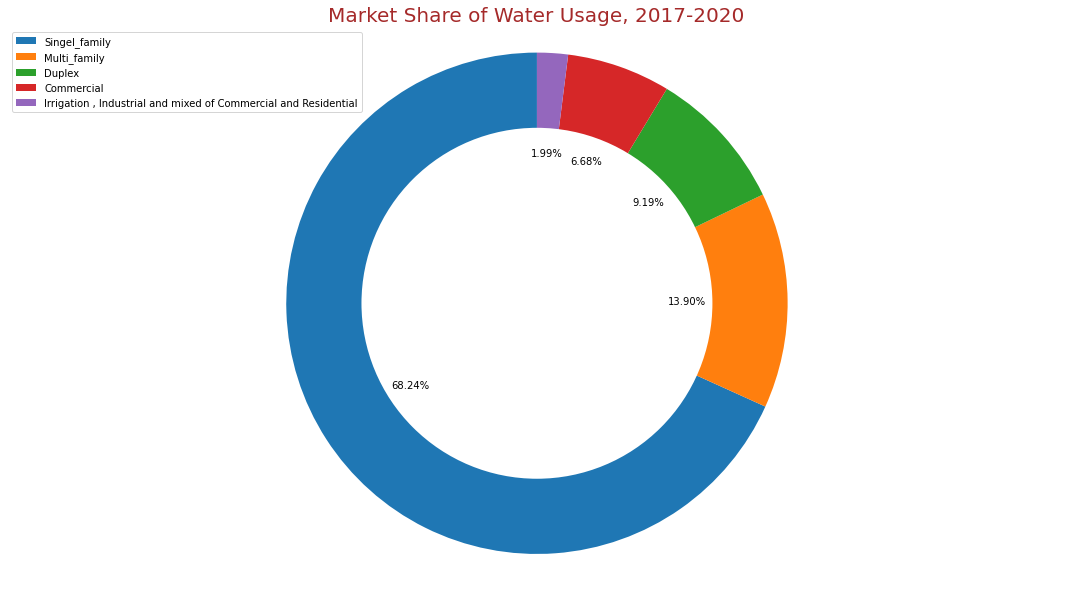

In [103]:
# Pie chart
plt.figure(figsize=(15,8))
data = [68.24, 13.9 ,  9.19,  6.68, 1.99]
labels = ['Singel_family', 'Multi_family', 'Duplex', 'Commercial',
          'Irrigation , Industrial and mixed of Commercial and Residential']

plt.pie(data, autopct='%1.2f%%', startangle=90)


#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Market Share of Water Usage, 2017-2020',fontsize= 20, color= 'brown')
plt.legend(labels, loc='best')
plt.show()

### Now,there is no missing value in Dwelling unit column of dataframes. 
### And about market share:

####    1) There is very small changes in the market share of Singel_family and Duplex.

####    2) The majority of customers (more than 91%) are Residential including single family dwelling, multi-family and duplex houses.

####    3) There are 6.68% commercial customers.  Only 2% of customers used water for commercial and residential, irrigation and industrial usage.

## 6) Visualizing missing values of numeric variables

### df1

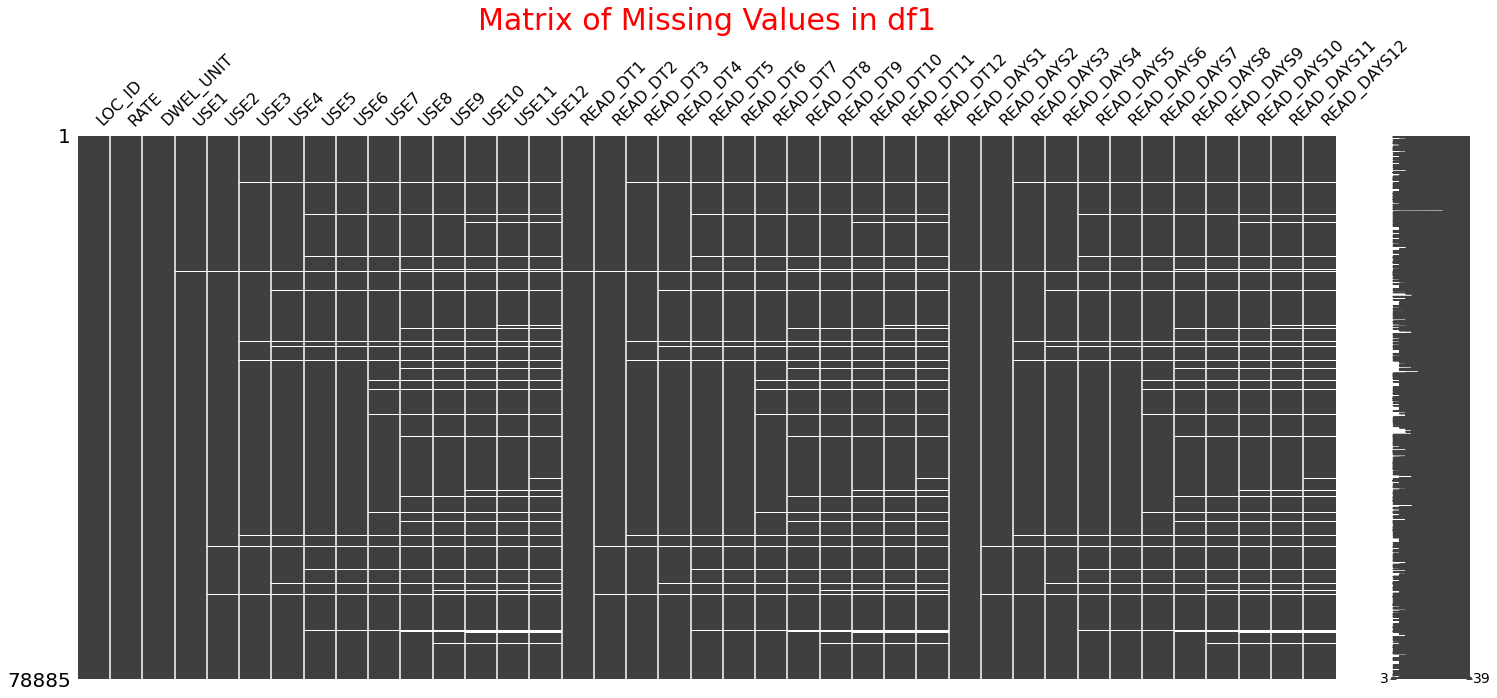

In [104]:
#Find matrix of missing values and plot it
msno.matrix(df1)
plt.title('Matrix of Missing Values in df1', fontsize=30, color='red')
plt.show()

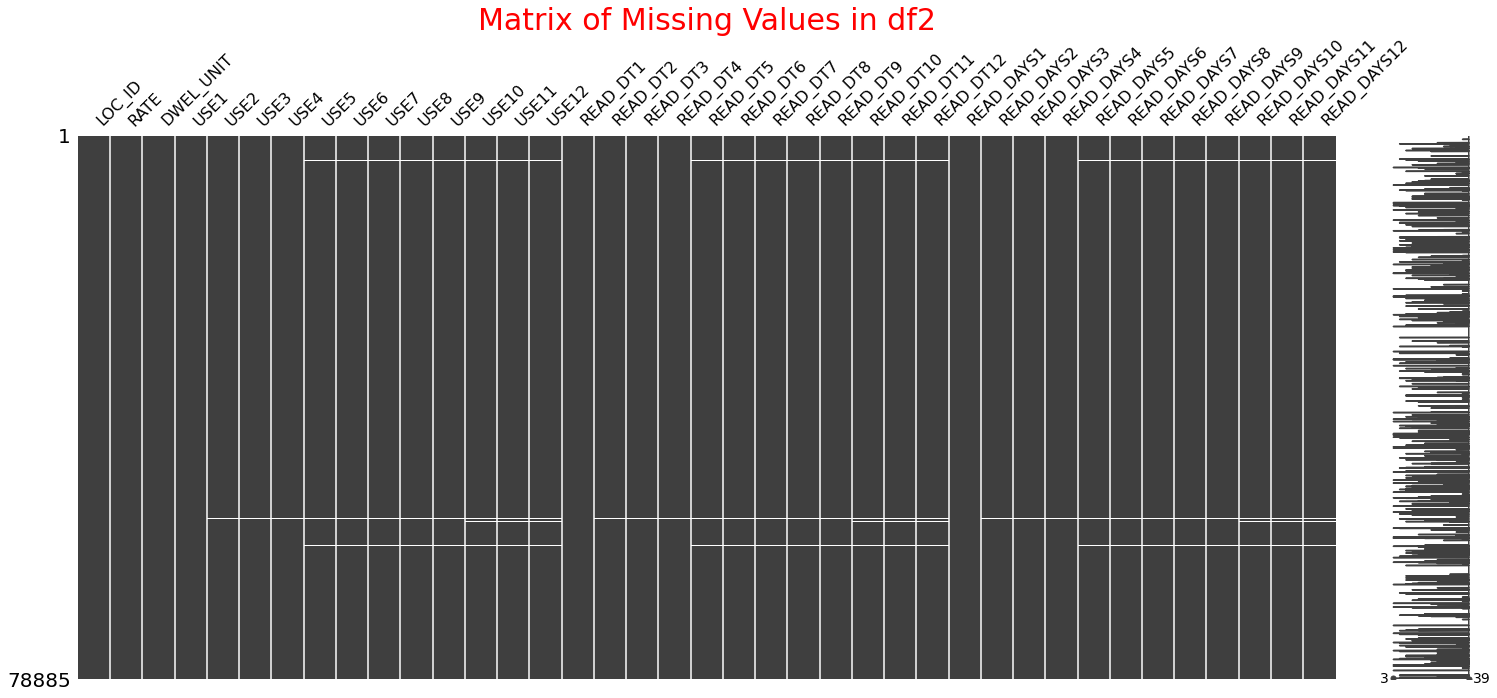

In [105]:
#Find matrix of missing values and plot it
msno.matrix(df2)
plt.title('Matrix of Missing Values in df2', fontsize=30, color='red')
plt.show()

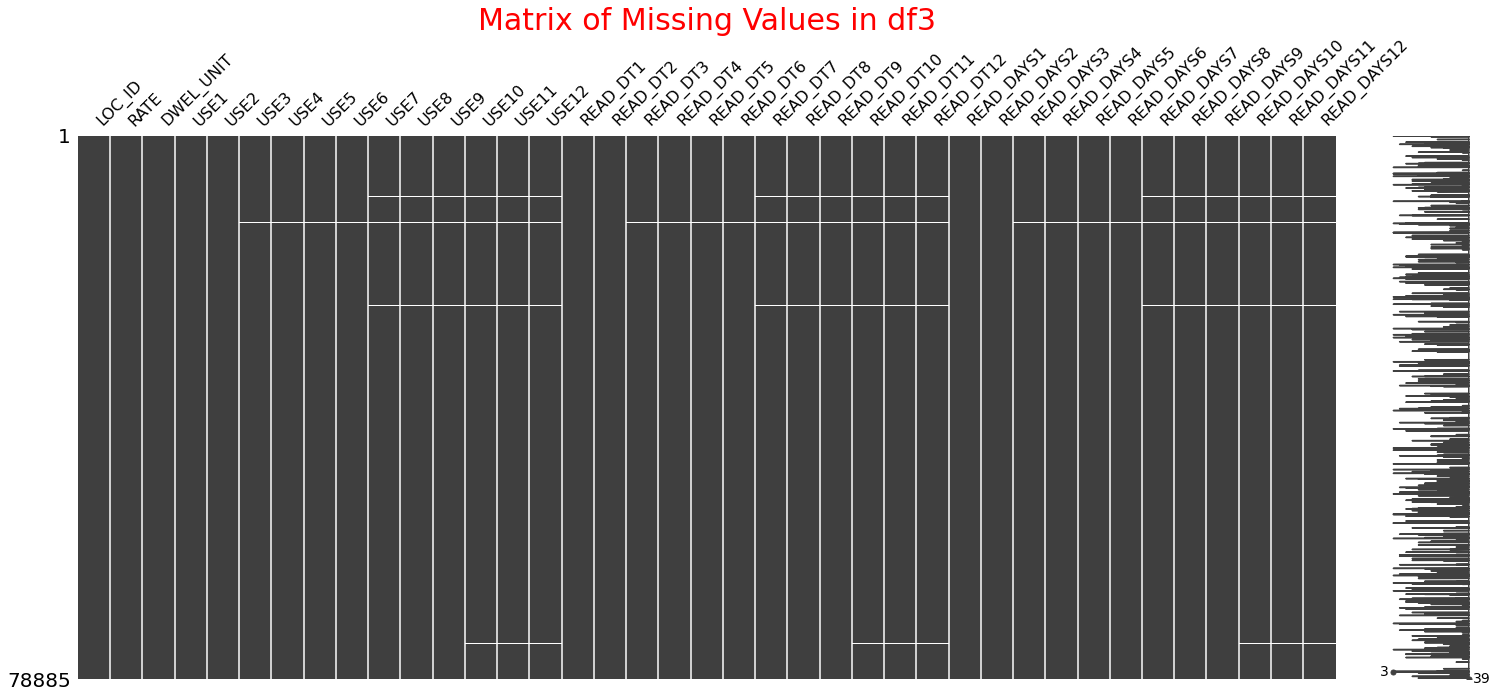

In [106]:
#Find matrix of missing values and plot it
msno.matrix(df3)
plt.title('Matrix of Missing Values in df3', fontsize=30, color='red')
plt.show()

**There are plenty missing values of usage and read date in df1 than df2 and df3.**

## 7) Find previous read date of each read date

### 7.1) Find previous read date of each read date 

**df1**

In [107]:
#Create a new dataframe that each row has an unique LOC_ID and RATE, and a group of columns of usage, read date and 
#read days which include all values of related columns in main df1. Remaining column(DWEL_UNIT) of df1 is in left intact.

long_df1 =pd.wide_to_long(df1, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()


print(long_df1.shape)
long_df1.head()

(946620, 7)


,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0
1,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0
2,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0
3,1000000000,RSFD,4,1.0,9.0,2018-04-11,29.0
4,1000000000,RSFD,5,1.0,10.0,2018-03-13,32.0


In [108]:
#Find the previous read date for each read date based on its associated read days.
long_df1['Previous_READ_DT'] = long_df1['READ_DT'] - pd.to_timedelta(long_df1['READ_DAYS'], unit='D')
long_df1.Previous_READ_DT = pd.to_datetime(long_df1.Previous_READ_DT)
long_df1.head()

,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11
1,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10
2,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11
3,1000000000,RSFD,4,1.0,9.0,2018-04-11,29.0,2018-03-13
4,1000000000,RSFD,5,1.0,10.0,2018-03-13,32.0,2018-02-09


In [109]:
#Dropping the rows that their Read date and previous read date are null
missing_read_date1 = long_df1[long_df1['READ_DT'].isna()]
long_df1 = long_df1[~long_df1['READ_DT'].isna()]
print(long_df1.shape)
long_df1.head()

(916474, 8)


,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11
1,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10
2,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11
3,1000000000,RSFD,4,1.0,9.0,2018-04-11,29.0,2018-03-13
4,1000000000,RSFD,5,1.0,10.0,2018-03-13,32.0,2018-02-09


In [110]:
long_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916474 entries, 0 to 946619
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LOC_ID            916474 non-null  int64         
 1   RATE              916474 non-null  category      
 2   period            916474 non-null  int64         
 3   DWEL_UNIT         916474 non-null  float64       
 4   USE               916474 non-null  float64       
 5   READ_DT           916474 non-null  datetime64[ns]
 6   READ_DAYS         916474 non-null  float64       
 7   Previous_READ_DT  916474 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(3), int64(2)
memory usage: 56.8 MB


### 5.2) Find previous read date of each read date and caculate the usage of each account per month, 2018-2019 

In [111]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df2 in 3 columns.
#with the index columns of LOC_ID and RATE.
df2.reset_index(inplace= True)
long_df2 =pd.wide_to_long(df2, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
print(long_df2.shape)
long_df2.head()

(946620, 8)


,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,RSFD,1,0,1.0,20.0,2019-07-10,30.0
1,1000000000,RSFD,2,0,1.0,13.0,2019-06-10,31.0
2,1000000000,RSFD,3,0,1.0,6.0,2019-05-10,29.0
3,1000000000,RSFD,4,0,1.0,5.0,2019-04-11,30.0
4,1000000000,RSFD,5,0,1.0,5.0,2019-03-12,29.0


In [112]:
#Find the previous read date for each read date based on its associated read days.
long_df2['Previous_READ_DT'] = long_df2['READ_DT'] - pd.to_timedelta(long_df2['READ_DAYS'], unit='D')
long_df2.Previous_READ_DT = pd.to_datetime(long_df2.Previous_READ_DT)
long_df2.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,20.0,2019-07-10,30.0,2019-06-10
1,1000000000,RSFD,2,0,1.0,13.0,2019-06-10,31.0,2019-05-10
2,1000000000,RSFD,3,0,1.0,6.0,2019-05-10,29.0,2019-04-11
3,1000000000,RSFD,4,0,1.0,5.0,2019-04-11,30.0,2019-03-12
4,1000000000,RSFD,5,0,1.0,5.0,2019-03-12,29.0,2019-02-11


In [113]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date2 = long_df2[long_df2['READ_DT'].isna()]
long_df2 = long_df2[~long_df2['READ_DT'].isna()]
print(long_df2.shape)
long_df2.head()

(943175, 9)


,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,20.0,2019-07-10,30.0,2019-06-10
1,1000000000,RSFD,2,0,1.0,13.0,2019-06-10,31.0,2019-05-10
2,1000000000,RSFD,3,0,1.0,6.0,2019-05-10,29.0,2019-04-11
3,1000000000,RSFD,4,0,1.0,5.0,2019-04-11,30.0,2019-03-12
4,1000000000,RSFD,5,0,1.0,5.0,2019-03-12,29.0,2019-02-11


In [114]:
long_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943175 entries, 0 to 946619
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LOC_ID            943175 non-null  int64         
 1   RATE              943175 non-null  category      
 2   period            943175 non-null  int64         
 3   index             943175 non-null  int64         
 4   DWEL_UNIT         943175 non-null  float64       
 5   USE               943175 non-null  float64       
 6   READ_DT           943175 non-null  datetime64[ns]
 7   READ_DAYS         943175 non-null  float64       
 8   Previous_READ_DT  943175 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(3), int64(3)
memory usage: 65.7 MB


### 7.2) Find previous read date of each read date and caculate the usage of each account per month, 2019-2020 

In [115]:
#Create a new df that assign all READ_DT, all READ_Days and all USE values from df3 in 3 columns.
#with the index columns of LOC_ID and RATE.
df3.reset_index(inplace= True)
long_df3 =pd.wide_to_long(df3, stubnames= ['USE','READ_DT', 'READ_DAYS'],
                i= ['LOC_ID','RATE'],
               j='period').reset_index()
print(long_df3.shape)
long_df3.head()

(946620, 8)


,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS
0,1000000000,RSFD,1,0,1.0,16.0,2020-07-10,31.0
1,1000000000,RSFD,2,0,1.0,13.0,2020-06-09,29.0
2,1000000000,RSFD,3,0,1.0,20.0,2020-05-11,31.0
3,1000000000,RSFD,4,0,1.0,10.0,2020-04-10,30.0
4,1000000000,RSFD,5,0,1.0,5.0,2020-03-11,29.0


In [116]:
#Find the previous read date for each read date based on its associated read days.
long_df3['Previous_READ_DT'] = long_df3['READ_DT'] - pd.to_timedelta(long_df3['READ_DAYS'], unit='D')
long_df3.Previous_READ_DT = pd.to_datetime(long_df3.Previous_READ_DT)
long_df3.head()

,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,16.0,2020-07-10,31.0,2020-06-09
1,1000000000,RSFD,2,0,1.0,13.0,2020-06-09,29.0,2020-05-11
2,1000000000,RSFD,3,0,1.0,20.0,2020-05-11,31.0,2020-04-10
3,1000000000,RSFD,4,0,1.0,10.0,2020-04-10,30.0,2020-03-11
4,1000000000,RSFD,5,0,1.0,5.0,2020-03-11,29.0,2020-02-11


In [117]:
#Dropping the accouts that its Read date and previous read date are Nat.
missing_read_date3 = long_df3[long_df3['READ_DT'].isna()]
long_df3 = long_df3[~long_df3['READ_DT'].isna()]
print(long_df3.shape)
long_df3.head()

(943412, 9)


,LOC_ID,RATE,period,index,DWEL_UNIT,USE,READ_DT,READ_DAYS,Previous_READ_DT
0,1000000000,RSFD,1,0,1.0,16.0,2020-07-10,31.0,2020-06-09
1,1000000000,RSFD,2,0,1.0,13.0,2020-06-09,29.0,2020-05-11
2,1000000000,RSFD,3,0,1.0,20.0,2020-05-11,31.0,2020-04-10
3,1000000000,RSFD,4,0,1.0,10.0,2020-04-10,30.0,2020-03-11
4,1000000000,RSFD,5,0,1.0,5.0,2020-03-11,29.0,2020-02-11


In [118]:
long_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943412 entries, 0 to 946619
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LOC_ID            943412 non-null  int64         
 1   RATE              943412 non-null  category      
 2   period            943412 non-null  int64         
 3   index             943412 non-null  int64         
 4   DWEL_UNIT         943412 non-null  float64       
 5   USE               943410 non-null  float64       
 6   READ_DT           943412 non-null  datetime64[ns]
 7   READ_DAYS         943412 non-null  float64       
 8   Previous_READ_DT  943412 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(3), int64(3)
memory usage: 65.7 MB


## 8) Caculate the usage of each account per month

### Functions

In [119]:
#Create a list of dataframes, each dataframe with index of month(s) between previous read data and read date, 
#and extracting the month and year of index(s)
def yr_month(small):
    result = []
    for tup in small.itertuples():
        #find the month between previous read date and read date
        index = pd.PeriodIndex([tup.Previous_READ_DT, tup.READ_DT],freq='M')
        temp = pd.DataFrame([(tup.LOC_ID, tup.RATE, tup.period, tup.DWEL_UNIT, tup.USE, tup.READ_DT,
                             tup.READ_DAYS, tup.Previous_READ_DT)], index= index)
        temp['month'] = temp.index.month
        temp['year'] = temp.index.year
        result.append(temp)
    result = pd.concat(result, axis= 0)
    return result

In [120]:
def days_in_period(data):
    #Create the month start for each row
    data['month_start'] = pd.to_datetime((data.year * 10000 + data.month * 100 + 1).apply(str) , format='%Y%m%d')

    #Find number of days in the month
    data['days_in_month'] = data[['year','month']].apply(lambda x: calendar.monthrange(x[0],x[1])[1], axis= 1)

    #Count number of days between start of month and read date
    data['read_date_to_month_start'] = data[['month_start','READ_DT']].apply(
                                            lambda x:pd.Timedelta(x[1]-x[0],'D').days, axis= 1)

    #Count number of days between previous read date and end of the month
    data['previous_read_date_to_month_end'] = data[['previous_read_date','month_start','days_in_month']].apply(
        lambda x: x[2] - pd.Timedelta(x[0]-x[1],'D').days, axis=1)

    #Count number of days in each period
    data['days_to_count_in_period'] = data[['previous_read_date_to_month_end','month_start',\
                                     'read_date_to_month_start','days_in_month']].apply(
                                    lambda x: x[3] if (x[0] > x[3] & x[2] >= x[3])
                                                   else(x[0] if x[0] <= x[3] else x[2]),axis=1)
    
        
    return data[['RATE','LOC_ID','DWEL_UNIT','month_start','days_in_month','previous_read_date',
                 'READ_DAYS','READ_DT', 'month','year','days_to_count_in_period','USE']]

### df1

In [121]:
#Chunk the long_df1 
chunk1 = long_df1.iloc[0:300000,:]
chunk2 = long_df1.iloc[300000:,:]

In [122]:
result1 = yr_month(chunk1)

In [123]:
result1.head()

,0,1,2,3,4,5,6,7,month,year
2018-06,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,6,2018
2018-07,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,7,2018
2018-05,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,5,2018
2018-06,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,6,2018
2018-04,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11,4,2018


In [124]:
result2 = yr_month(chunk2)

In [125]:
#Concatenate the results of chunks, and rename the columns 
long_df1 = pd.concat([result1,result2], axis= 0).reset_index()

#Label columns appropriately
long_df1.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)

print(long_df1.shape)
long_df1.head()

(1832948, 11)


,index,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year
0,2018-06,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,6,2018
1,2018-07,1000000000,RSFD,1,1.0,22.0,2018-07-11,30.0,2018-06-11,7,2018
2,2018-05,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,5,2018
3,2018-06,1000000000,RSFD,2,1.0,22.0,2018-06-11,32.0,2018-05-10,6,2018
4,2018-04,1000000000,RSFD,3,1.0,15.0,2018-05-10,29.0,2018-04-11,4,2018


In [126]:
long_df1.reset_index(inplace=True)
small_df1 = days_in_period(long_df1)
small_df1.head()

,RATE,LOC_ID,DWEL_UNIT,month_start,days_in_month,previous_read_date,READ_DAYS,READ_DT,month,year,days_to_count_in_period,USE
0,RSFD,1000000000,1.0,2018-06-01,30,2018-06-11,30.0,2018-07-11,6,2018,20,22.0
1,RSFD,1000000000,1.0,2018-07-01,31,2018-06-11,30.0,2018-07-11,7,2018,10,22.0
2,RSFD,1000000000,1.0,2018-05-01,31,2018-05-10,32.0,2018-06-11,5,2018,22,22.0
3,RSFD,1000000000,1.0,2018-06-01,30,2018-05-10,32.0,2018-06-11,6,2018,10,22.0
4,RSFD,1000000000,1.0,2018-04-01,30,2018-04-11,29.0,2018-05-10,4,2018,20,15.0


In [127]:
small_df1['usage_to_count_in_period'] = round((small_df1.days_to_count_in_period / small_df1.READ_DAYS) * small_df1.USE, 1)
small_df1.head()

<ipython-input-127-15baa3d7d8d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df1['usage_to_count_in_period'] = round((small_df1.days_to_count_in_period / small_df1.READ_DAYS) * small_df1.USE, 1)


,RATE,LOC_ID,DWEL_UNIT,month_start,days_in_month,previous_read_date,READ_DAYS,READ_DT,month,year,days_to_count_in_period,USE,usage_to_count_in_period
0,RSFD,1000000000,1.0,2018-06-01,30,2018-06-11,30.0,2018-07-11,6,2018,20,22.0,14.7
1,RSFD,1000000000,1.0,2018-07-01,31,2018-06-11,30.0,2018-07-11,7,2018,10,22.0,7.3
2,RSFD,1000000000,1.0,2018-05-01,31,2018-05-10,32.0,2018-06-11,5,2018,22,22.0,15.1
3,RSFD,1000000000,1.0,2018-06-01,30,2018-05-10,32.0,2018-06-11,6,2018,10,22.0,6.9
4,RSFD,1000000000,1.0,2018-04-01,30,2018-04-11,29.0,2018-05-10,4,2018,20,15.0,10.3


In [128]:
small_df1.isnull().sum()

RATE                        0
LOC_ID                      0
DWEL_UNIT                   0
month_start                 0
days_in_month               0
previous_read_date          0
READ_DAYS                   0
READ_DT                     0
month                       0
year                        0
days_to_count_in_period     0
USE                         0
usage_to_count_in_period    0
dtype: int64

In [129]:
small_df1.describe()

,LOC_ID,DWEL_UNIT,days_in_month,READ_DAYS,month,year,days_to_count_in_period,USE,usage_to_count_in_period
count,1.832948e+06,1.832948e+06,1.832948e+06,1.832948e+06,1.832948e+06,1.832948e+06,1.832948e+06,1.832948e+06,1.832948e+06
mean,1.000039e+09,2.091431e+00,3.044337e+01,3.045399e+01,6.466700e+00,2.017569e+03,1.524685e+01,2.191004e+01,1.092448e+01
std,2.277445e+04,7.366812e+00,8.410156e-01,2.897039e+00,3.413716e+00,4.951835e-01,8.482162e+00,1.772236e+02,9.063176e+01
min,1.000000e+09,1.000000e+00,2.800000e+01,8.000000e+00,1.000000e+00,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000020e+09,1.000000e+00,3.000000e+01,2.900000e+01,4.000000e+00,2.017000e+03,8.000000e+00,6.000000e+00,2.000000e+00
50%,1.000039e+09,1.000000e+00,3.100000e+01,3.000000e+01,6.000000e+00,2.018000e+03,1.500000e+01,1.000000e+01,4.500000e+00
75%,1.000059e+09,1.000000e+00,3.100000e+01,3.200000e+01,9.000000e+00,2.018000e+03,2.200000e+01,1.700000e+01,8.900000e+00
max,1.000079e+09,5.700000e+02,3.100000e+01,7.630000e+02,1.200000e+01,2.018000e+03,3.100000e+01,4.817200e+04,1.803060e+04


**Min of days_to_count_in_period is zero.**

In [130]:
small_df1 = small_df1.groupby(['RATE', 'month_start'])\
                            [['DWEL_UNIT','days_to_count_in_period', 'usage_to_count_in_period']].sum().reset_index()
small_df1.rename(columns= {'days_to_count_in_period': 'days_in_period', 'usage_to_count_in_period': 'usge_in_period'})
small_df1.head()

,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period
0,COM,2016-04-01,1.0,19,1.4
1,COM,2016-05-01,1.0,12,0.5
2,COM,2016-11-01,3.0,56,5.7
3,COM,2016-12-01,4.0,62,6.7
4,COM,2017-01-01,5.0,69,8.4


------

## df2

In [131]:
#Chunk the long_df2 
chunk3 = long_df2.iloc[0:450000,:]
chunk4 = long_df2.iloc[450000:,:]

In [132]:
result3 = yr_month(chunk3)

In [133]:
result4 = yr_month(chunk4)

In [134]:
long_df2 = pd.concat([result3,result4], axis=0).reset_index()
long_df2.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)
print(long_df2.shape)
long_df2.head()

(1886350, 11)


,index,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year
0,2019-06,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,6,2019
1,2019-07,1000000000,RSFD,1,1.0,20.0,2019-07-10,30.0,2019-06-10,7,2019
2,2019-05,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,5,2019
3,2019-06,1000000000,RSFD,2,1.0,13.0,2019-06-10,31.0,2019-05-10,6,2019
4,2019-04,1000000000,RSFD,3,1.0,6.0,2019-05-10,29.0,2019-04-11,4,2019


In [135]:
long_df2 = long_df2.reset_index()
small_df2 = days_in_period(long_df2)
small_df2.head()

,RATE,LOC_ID,DWEL_UNIT,month_start,days_in_month,previous_read_date,READ_DAYS,READ_DT,month,year,days_to_count_in_period,USE
0,RSFD,1000000000,1.0,2019-06-01,30,2019-06-10,30.0,2019-07-10,6,2019,21,20.0
1,RSFD,1000000000,1.0,2019-07-01,31,2019-06-10,30.0,2019-07-10,7,2019,9,20.0
2,RSFD,1000000000,1.0,2019-05-01,31,2019-05-10,31.0,2019-06-10,5,2019,22,13.0
3,RSFD,1000000000,1.0,2019-06-01,30,2019-05-10,31.0,2019-06-10,6,2019,9,13.0
4,RSFD,1000000000,1.0,2019-04-01,30,2019-04-11,29.0,2019-05-10,4,2019,20,6.0


In [139]:
small_df2['usage_to_count_in_period'] = round((small_df2.days_to_count_in_period / small_df2.READ_DAYS) * small_df2.USE, 1)
small_df2.head()

<ipython-input-139-91894a2fea5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df2['usage_to_count_in_period'] = round((small_df2.days_to_count_in_period / small_df2.READ_DAYS) * small_df2.USE, 1)


,RATE,LOC_ID,DWEL_UNIT,month_start,days_in_month,previous_read_date,READ_DAYS,READ_DT,month,year,days_to_count_in_period,USE,usage_to_count_in_period
0,RSFD,1000000000,1.0,2019-06-01,30,2019-06-10,30.0,2019-07-10,6,2019,21,20.0,14.0
1,RSFD,1000000000,1.0,2019-07-01,31,2019-06-10,30.0,2019-07-10,7,2019,9,20.0,6.0
2,RSFD,1000000000,1.0,2019-05-01,31,2019-05-10,31.0,2019-06-10,5,2019,22,13.0,9.2
3,RSFD,1000000000,1.0,2019-06-01,30,2019-05-10,31.0,2019-06-10,6,2019,9,13.0,3.8
4,RSFD,1000000000,1.0,2019-04-01,30,2019-04-11,29.0,2019-05-10,4,2019,20,6.0,4.1


In [140]:
small_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886350 entries, 0 to 1886349
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   RATE                      object        
 1   LOC_ID                    int64         
 2   DWEL_UNIT                 float64       
 3   month_start               datetime64[ns]
 4   days_in_month             int64         
 5   previous_read_date        datetime64[ns]
 6   READ_DAYS                 float64       
 7   READ_DT                   datetime64[ns]
 8   month                     int64         
 9   year                      int64         
 10  days_to_count_in_period   int64         
 11  USE                       float64       
 12  usage_to_count_in_period  float64       
dtypes: datetime64[ns](3), float64(4), int64(5), object(1)
memory usage: 187.1+ MB


In [141]:
small_df2.describe()

,LOC_ID,DWEL_UNIT,days_in_month,READ_DAYS,month,year,days_to_count_in_period,USE,usage_to_count_in_period
count,1.886350e+06,1.886350e+06,1.886350e+06,1.886350e+06,1.886350e+06,1.886350e+06,1.886350e+06,1.886350e+06,1.886350e+06
mean,1.000039e+09,2.089456e+00,3.044847e+01,3.046122e+01,6.497316e+00,2.018563e+03,1.527481e+01,2.070706e+01,1.039344e+01
std,2.277606e+04,7.360706e+00,8.403948e-01,2.162086e+00,3.415857e+00,4.960451e-01,8.458280e+00,1.636639e+02,8.725674e+01
min,1.000000e+09,1.000000e+00,2.800000e+01,8.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000020e+09,1.000000e+00,3.000000e+01,2.900000e+01,4.000000e+00,2.018000e+03,8.000000e+00,6.000000e+00,1.800000e+00
50%,1.000039e+09,1.000000e+00,3.100000e+01,3.000000e+01,7.000000e+00,2.019000e+03,1.500000e+01,1.000000e+01,4.100000e+00
75%,1.000059e+09,1.000000e+00,3.100000e+01,3.200000e+01,9.000000e+00,2.019000e+03,2.200000e+01,1.600000e+01,8.400000e+00
max,1.000079e+09,5.700000e+02,3.100000e+01,4.830000e+02,1.200000e+01,2.019000e+03,3.100000e+01,2.609700e+04,1.692010e+04


In [142]:
small_df2 = small_df2.groupby(['RATE', 'month_start'])\
                            [['DWEL_UNIT','days_to_count_in_period', 'usage_to_count_in_period']].sum().reset_index()
small_df2.rename(columns= {'days_to_count_in_period': 'days_in_period', 'usage_to_count_in_period': 'usge_in_period'})
small_df2.head()

,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period
0,COM,2016-04-01,1.0,20,4.7
1,COM,2017-06-01,2.0,30,7.3
2,COM,2018-02-01,3.0,23,14.7
3,COM,2018-03-01,7.0,107,38.8
4,COM,2018-04-01,6.0,107,193.8


----

## df3

In [143]:
#Chunk the long_df3 
chunk5 = long_df3.iloc[0:450000,:]
chunk6 = long_df3.iloc[450000:,:]

In [144]:
result5 = yr_month(chunk5)

In [145]:
result6 = yr_month(chunk6)

In [146]:
long_df3 = pd.concat([result5, result6], axis=0).reset_index()
long_df3.rename(columns = {0:'LOC_ID', 1:'RATE', 2:'period',3:'DWEL_UNIT',4:'USE',
                        5:'READ_DT',6:'READ_DAYS', 7:'previous_read_date'}, inplace=True)
long_df3.head()

,index,LOC_ID,RATE,period,DWEL_UNIT,USE,READ_DT,READ_DAYS,previous_read_date,month,year
0,2020-06,1000000000,RSFD,1,1.0,16.0,2020-07-10,31.0,2020-06-09,6,2020
1,2020-07,1000000000,RSFD,1,1.0,16.0,2020-07-10,31.0,2020-06-09,7,2020
2,2020-05,1000000000,RSFD,2,1.0,13.0,2020-06-09,29.0,2020-05-11,5,2020
3,2020-06,1000000000,RSFD,2,1.0,13.0,2020-06-09,29.0,2020-05-11,6,2020
4,2020-04,1000000000,RSFD,3,1.0,20.0,2020-05-11,31.0,2020-04-10,4,2020


In [147]:
long_df3 = long_df3.reset_index()
small_df3 = days_in_period(long_df3)
small_df3.head()

,RATE,LOC_ID,DWEL_UNIT,month_start,days_in_month,previous_read_date,READ_DAYS,READ_DT,month,year,days_to_count_in_period,USE
0,RSFD,1000000000,1.0,2020-06-01,30,2020-06-09,31.0,2020-07-10,6,2020,22,16.0
1,RSFD,1000000000,1.0,2020-07-01,31,2020-06-09,31.0,2020-07-10,7,2020,9,16.0
2,RSFD,1000000000,1.0,2020-05-01,31,2020-05-11,29.0,2020-06-09,5,2020,21,13.0
3,RSFD,1000000000,1.0,2020-06-01,30,2020-05-11,29.0,2020-06-09,6,2020,8,13.0
4,RSFD,1000000000,1.0,2020-04-01,30,2020-04-10,31.0,2020-05-11,4,2020,21,20.0


In [150]:
small_df3['usage_to_count_in_period'] = round((small_df3.days_to_count_in_period / small_df3.READ_DAYS) * small_df3.USE, 1)
small_df3.head()

<ipython-input-150-481aaab3d3cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df3['usage_to_count_in_period'] = round((small_df3.days_to_count_in_period / small_df3.READ_DAYS) * small_df3.USE, 1)


,RATE,LOC_ID,DWEL_UNIT,month_start,days_in_month,previous_read_date,READ_DAYS,READ_DT,month,year,days_to_count_in_period,USE,usage_to_count_in_period
0,RSFD,1000000000,1.0,2020-06-01,30,2020-06-09,31.0,2020-07-10,6,2020,22,16.0,11.4
1,RSFD,1000000000,1.0,2020-07-01,31,2020-06-09,31.0,2020-07-10,7,2020,9,16.0,4.6
2,RSFD,1000000000,1.0,2020-05-01,31,2020-05-11,29.0,2020-06-09,5,2020,21,13.0,9.4
3,RSFD,1000000000,1.0,2020-06-01,30,2020-05-11,29.0,2020-06-09,6,2020,8,13.0,3.6
4,RSFD,1000000000,1.0,2020-04-01,30,2020-04-10,31.0,2020-05-11,4,2020,21,20.0,13.5


In [151]:
long_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886824 entries, 0 to 1886823
Data columns (total 17 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   level_0                          int64         
 1   index                            period[M]     
 2   LOC_ID                           int64         
 3   RATE                             object        
 4   period                           int64         
 5   DWEL_UNIT                        float64       
 6   USE                              float64       
 7   READ_DT                          datetime64[ns]
 8   READ_DAYS                        float64       
 9   previous_read_date               datetime64[ns]
 10  month                            int64         
 11  year                             int64         
 12  month_start                      datetime64[ns]
 13  days_in_month                    int64         
 14  read_date_to_month_start         i

In [152]:
long_df3.describe()

,level_0,LOC_ID,period,DWEL_UNIT,USE,READ_DAYS,month,year,days_in_month,read_date_to_month_start,previous_read_date_to_month_end,days_to_count_in_period
count,1.886824e+06,1.886824e+06,1.886824e+06,1.886824e+06,1.886820e+06,1.886824e+06,1.886824e+06,1.886824e+06,1.886824e+06,1.886824e+06,1.886824e+06,1.886824e+06
mean,9.434115e+05,1.000039e+09,6.493438e+00,2.086654e+00,2.072445e+01,3.050588e+01,6.503100e+00,2.019562e+03,3.051732e+01,2.976143e+01,3.126176e+01,1.524539e+01
std,5.446793e+05,2.277349e+04,3.452018e+00,7.295967e+00,1.632797e+02,2.088067e+00,3.428426e+00,4.960862e-01,6.347279e-01,1.746873e+01,1.746859e+01,8.398280e+00
min,0.000000e+00,1.000000e+09,1.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,2.018000e+03,2.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.717058e+05,1.000020e+09,3.000000e+00,1.000000e+00,6.000000e+00,2.900000e+01,4.000000e+00,2.019000e+03,3.000000e+01,1.400000e+01,1.600000e+01,8.000000e+00
50%,9.434115e+05,1.000039e+09,6.000000e+00,1.000000e+00,1.000000e+01,3.000000e+01,6.000000e+00,2.020000e+03,3.100000e+01,3.000000e+01,3.000000e+01,1.500000e+01
75%,1.415117e+06,1.000059e+09,9.000000e+00,1.000000e+00,1.700000e+01,3.200000e+01,9.000000e+00,2.020000e+03,3.100000e+01,4.500000e+01,4.700000e+01,2.200000e+01
max,1.886823e+06,1.000079e+09,1.200000e+01,5.700000e+02,2.644800e+04,2.680000e+02,1.200000e+01,2.020000e+03,3.100000e+01,2.860000e+02,2.850000e+02,3.100000e+01


In [153]:
small_df3 = small_df3.groupby(['RATE', 'month_start'])\
                            [['DWEL_UNIT','days_to_count_in_period', 'usage_to_count_in_period']].sum().reset_index()
small_df3.rename(columns= {'days_to_count_in_period': 'days_in_period', 'usage_to_count_in_period': 'usge_in_period'})
print(small_df3.shape)
small_df3.head()

(131, 5)


,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period
0,COM,2019-01-01,1.0,21,46.7
1,COM,2019-02-01,4.0,44,61.0
2,COM,2019-03-01,6.0,118,567.0
3,COM,2019-04-01,13.0,184,852.1
4,COM,2019-05-01,24.0,357,2161.7


-----

## 9) Integrating the cleaned data

In [163]:
small_df3

,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period
0,COM,2019-01-01,1.0,21,46.7
1,COM,2019-02-01,4.0,44,61.0
2,COM,2019-03-01,6.0,118,567.0
3,COM,2019-04-01,13.0,184,852.1
4,COM,2019-05-01,24.0,357,2161.7
...,...,...,...,...,...
126,RSFD,2020-04-01,109581.0,1645378,497014.6
127,RSFD,2020-05-01,104436.0,1618833,583202.5
128,RSFD,2020-06-01,110173.0,1654069,636767.1
129,RSFD,2020-07-01,67105.0,1135416,448037.8


In [176]:
data2017_2020 = pd.concat([small_df1.set_index(['RATE','month_start']), small_df2.set_index(['RATE','month_start']),
                           small_df3.set_index(['RATE','month_start'])], axis=0)
data2017_2020.reset_index(inplace=True)
print(data2017_2020.shape)
print(data2017_2020.head())
data2017_2020.to_excel('data2017_2020.xlsx', index= False)

(412, 5)
  RATE month_start  DWEL_UNIT  days_to_count_in_period  \
0  COM  2016-04-01        1.0                       19   
1  COM  2016-05-01        1.0                       12   
2  COM  2016-11-01        3.0                       56   
3  COM  2016-12-01        4.0                       62   
4  COM  2017-01-01        5.0                       69   

   usage_to_count_in_period  
0                       1.4  
1                       0.5  
2                       5.7  
3                       6.7  
4                       8.4  
